In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from nnpde2diff1d import NNPDE2DIFF1D
from pde2diff1d import PDE2DIFF1D

In [2]:
%%javascript
MathJax.Hub.Config({
      TeX: { equationNumbers: { autoNumber: "AMS" } }
    });MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

## The problem

### Create the training data.

In [3]:
nx = 10
nt = 11
xt = np.linspace(0, 1, nx)
tt = np.linspace(0, 1, nt)
x_train = np.array(list(zip(np.tile(xt, nt), np.repeat(tt, nx))))

### Read the differential equation.

In [4]:
eq_name = 'diff1d_0'
eq = PDE2DIFF1D(eq_name)

### Compute the analytical solution.

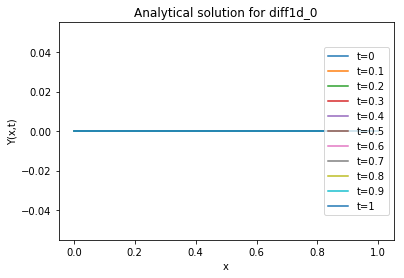

In [5]:
n = nx*nt
Ya = np.zeros(n)
for i in range(n):
    Ya[i] = eq.Yaf(x_train[i])
Ya = Ya.reshape((nt, nx))
for i in range(nt):
    plt.plot(xt, Ya[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Y(x,t)')
plt.legend(loc='right')
plt.title('Analytical solution for %s' % eq_name);

## Nelder-Mead (default)

In [6]:
net1 = NNPDE2DIFF1D(eq)
trainalg = 'Nelder-Mead'
options = {}
options['disp'] = True
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net1.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net1.res)

2min 4s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
 final_simplex: (array([[ 0.08813219,  0.44136797,  0.22094727, ...,  0.28579578,
        -0.31909807,  0.48658776],
       [ 0.0877777 ,  0.44214817,  0.22109919, ...,  0.28670798,
        -0.3155229 ,  0.48793439],
       [ 0.08769694,  0.44220196,  0.22108803, ...,  0.28647172,
        -0.31649395,  0.48743471],
       ...,
       [ 0.08741717,  0.44293763,  0.22126567, ...,  0.28750577,
        -0.31177077,  0.48906471],
       [ 0.0871146 ,  0.44288308,  0.22111142, ...,  0.28771248,
        -0.31268384,  0.4887554 ],
       [ 0.08703993,  0.44301332,  0.2211254 , ...,  0.28780597,
        -0.31265706,  0.48878619]]), array([3.12405302e-05, 3.14371584e-05, 3.14668796e-05, 3.14753839e-05,
       3.15369850e-05, 3.15739633e-05, 3.15860525e-05, 3.16271207e-05,
       3.16304009e-05, 3.16955416e-05, 3.17113242e-05, 3.17497840e-05,
       3.17600215e-05, 3.17992435e-05, 3.18190099e-05, 3.18355519e-05,
       3.18454319e-0

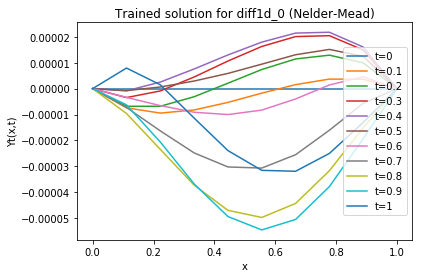

In [7]:
Yt1 = net1.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s)' % (eq_name, trainalg));

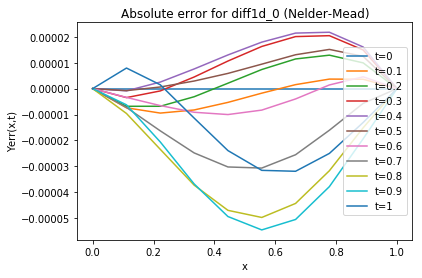

In [8]:
Y_err1 = Yt1 - Ya
for i in range(nt):
    plt.plot(xt, Y_err1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s)' % (eq_name, trainalg));

## Nelder-Mead (maxfev=16000)

In [9]:
net2 = NNPDE2DIFF1D(eq)
trainalg = 'Nelder-Mead'
options = {}
options['disp'] = True
options['maxfev'] = 16000
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net2.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net2.res)

Optimization terminated successfully.
         Current function value: 0.000003
         Iterations: 10212
         Function evaluations: 12252
3min 18s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
 final_simplex: (array([[ 0.1396381 ,  0.39542944,  0.22683283, ...,  0.25556658,
        -0.2838802 ,  0.50370587],
       [ 0.13963192,  0.39543689,  0.22683284, ...,  0.2555704 ,
        -0.28387427,  0.50370702],
       [ 0.13963982,  0.39542694,  0.22683274, ...,  0.25556572,
        -0.28387895,  0.50370602],
       ...,
       [ 0.13962901,  0.39543957,  0.22683255, ...,  0.25557273,
        -0.28386935,  0.50370805],
       [ 0.13963211,  0.39543476,  0.22683226, ...,  0.25557149,
        -0.28386608,  0.50370832],
       [ 0.13963594,  0.39543117,  0.2268326 , ...,  0.25556832,
        -0.28387517,  0.50370657]]), array([3.14594951e-06, 3.14594962e-06, 3.14594968e-06, 3.14594969e-06,
       3.14594971e-06, 3.14594977e-06, 3.14594978e-06, 3.14594980e-06,
       3.14594986

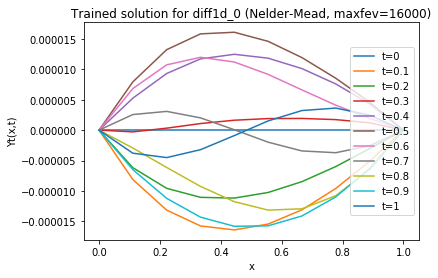

In [10]:
Yt2 = net2.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

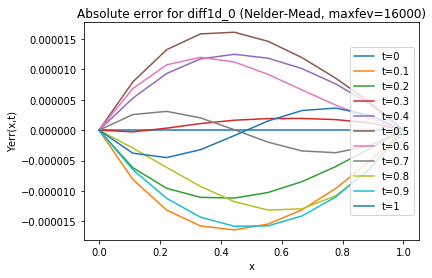

In [11]:
Y_err2 = Yt2 - Ya
for i in range(nt):
    plt.plot(xt, Y_err2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

## Nelder-Mead (maxfev=16000, xatol=fatol=1e-6)

In [12]:
net3 = NNPDE2DIFF1D(eq)
trainalg = 'Nelder-Mead'
options = {}
options['disp'] = True
options['fatol'] = 1e-6
options['maxfev'] = 16000
options['xatol'] = 1e-6
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net3.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net3.res)

4min 20s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
 final_simplex: (array([[ 0.13541507,  0.40449073,  0.22711143, ...,  0.25845492,
        -0.29094687,  0.50518183],
       [ 0.13564682,  0.4041137 ,  0.22711238, ...,  0.25825856,
        -0.29115421,  0.505044  ],
       [ 0.13545377,  0.40430227,  0.22708267, ...,  0.25844119,
        -0.29080458,  0.50514775],
       ...,
       [ 0.13611185,  0.40309518,  0.22703688, ...,  0.25803788,
        -0.29029654,  0.50498473],
       [ 0.13627987,  0.40280405,  0.22705368, ...,  0.2578831 ,
        -0.29012055,  0.50490285],
       [ 0.1362921 ,  0.40278275,  0.22705049, ...,  0.25787235,
        -0.29020018,  0.50488626]]), array([2.73034087e-06, 2.73443534e-06, 2.73832296e-06, 2.74097964e-06,
       2.74144754e-06, 2.74222241e-06, 2.74495265e-06, 2.74581986e-06,
       2.74663535e-06, 2.74666707e-06, 2.74723110e-06, 2.74841240e-06,
       2.75000604e-06, 2.75027164e-06, 2.75030400e-06, 2.75033250e-06,
       2.75136648e-

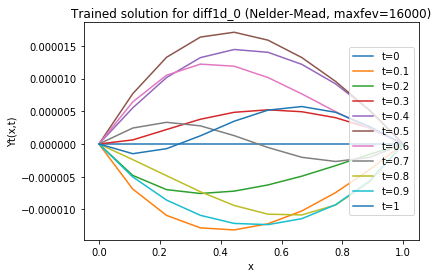

In [13]:
Yt3 = net3.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

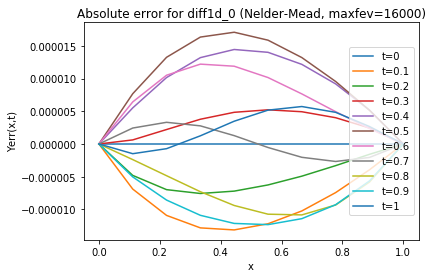

In [14]:
Y_err3 = Yt3 - Ya
for i in range(nt):
    plt.plot(xt, Y_err3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

## Nelder-Mead (maxfev=32000, xatol=fatol=1e-6)

In [15]:
net4 = NNPDE2DIFF1D(eq)
trainalg = 'Nelder-Mead'
options = {}
options['disp'] = True
options['fatol'] = 1e-6
options['maxfev'] = 32000
options['xatol'] = 1e-6
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net4.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net4.res)

8min 47s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
 final_simplex: (array([[ 0.07802948,  0.46363943,  0.23224968, ...,  0.2941544 ,
        -0.36293689,  0.53423994],
       [ 0.07803955,  0.46363584,  0.23224913, ...,  0.29414983,
        -0.36293093,  0.53423434],
       [ 0.07804027,  0.46363762,  0.23224889, ...,  0.29414946,
        -0.3629214 ,  0.53423321],
       ...,
       [ 0.0780566 ,  0.46363544,  0.23224823, ...,  0.29414194,
        -0.3629028 ,  0.53422454],
       [ 0.07806556,  0.46363225,  0.23224762, ...,  0.2941377 ,
        -0.36289357,  0.53421906],
       [ 0.07803712,  0.46363626,  0.23224941, ...,  0.29415045,
        -0.36293266,  0.53423493]]), array([4.03281115e-07, 4.03281192e-07, 4.03281204e-07, 4.03281242e-07,
       4.03281351e-07, 4.03281381e-07, 4.03281409e-07, 4.03281430e-07,
       4.03281482e-07, 4.03281512e-07, 4.03281525e-07, 4.03281535e-07,
       4.03281550e-07, 4.03281551e-07, 4.03281568e-07, 4.03281590e-07,
       4.03281659e-

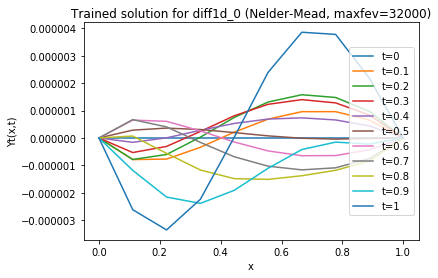

In [16]:
Yt4 = net4.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt4[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

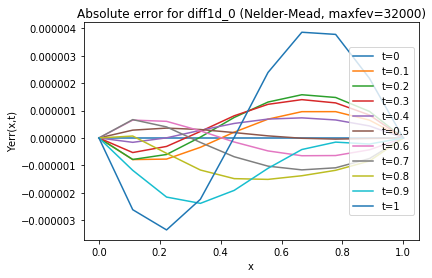

In [17]:
Y_err4 = Yt4 - Ya
for i in range(nt):
    plt.plot(xt, Y_err4[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

## Nelder-Mead (maxfev=64000, xatol=fatol=1e-6)

In [18]:
net5 = NNPDE2DIFF1D(eq)
trainalg = 'Nelder-Mead'
options = {}
options['disp'] = True
options['fatol'] = 1e-6
options['maxfev'] = 64000
options['xatol'] = 1e-6
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net5.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net5.res)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 36862
         Function evaluations: 43114
12min 2s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
 final_simplex: (array([[ 0.08312541,  0.4768336 ,  0.23164326, ...,  0.29495138,
        -0.36274698,  0.52970357],
       [ 0.08312543,  0.47683357,  0.23164325, ...,  0.29495137,
        -0.36274698,  0.52970355],
       [ 0.0831254 ,  0.47683359,  0.23164326, ...,  0.29495138,
        -0.36274698,  0.52970357],
       ...,
       [ 0.08312542,  0.47683357,  0.23164326, ...,  0.29495137,
        -0.36274698,  0.52970356],
       [ 0.08312539,  0.47683358,  0.23164326, ...,  0.29495138,
        -0.36274698,  0.52970358],
       [ 0.08312539,  0.47683361,  0.23164326, ...,  0.29495139,
        -0.362747  ,  0.52970358]]), array([2.79993787e-07, 2.79993787e-07, 2.79993787e-07, 2.79993787e-07,
       2.79993787e-07, 2.79993787e-07, 2.79993787e-07, 2.79993787e-07,
       2.79993787

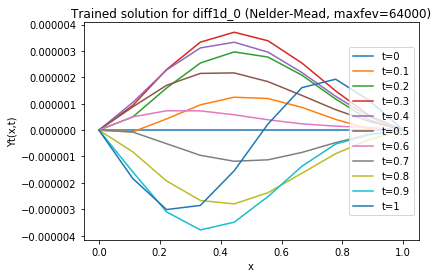

In [19]:
Yt5 = net5.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt5[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

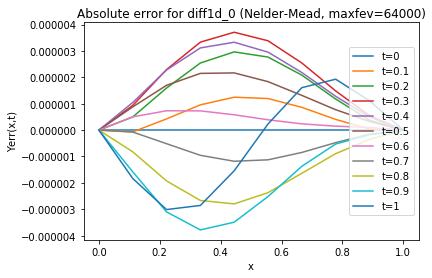

In [20]:
Y_err5 = Yt5 - Ya
for i in range(nt):
    plt.plot(xt, Y_err5[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

## Nelder-Mead (maxfev=64000, xatol=fatol=1e-8)

In [21]:
net6 = NNPDE2DIFF1D(eq)
trainalg = 'Nelder-Mead'
options = {}
options['disp'] = True
options['fatol'] = 1e-8
options['maxfev'] = 64000
options['xatol'] = 1e-8
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net6.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net6.res)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 37040
         Function evaluations: 43571
11min 40s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
 final_simplex: (array([[ 0.08312541,  0.47683358,  0.23164326, ...,  0.29495137,
        -0.36274697,  0.52970356],
       [ 0.08312541,  0.47683358,  0.23164326, ...,  0.29495137,
        -0.36274697,  0.52970356],
       [ 0.08312541,  0.47683358,  0.23164326, ...,  0.29495137,
        -0.36274697,  0.52970356],
       ...,
       [ 0.08312541,  0.47683358,  0.23164326, ...,  0.29495137,
        -0.36274697,  0.52970356],
       [ 0.08312541,  0.47683358,  0.23164326, ...,  0.29495137,
        -0.36274697,  0.52970356],
       [ 0.08312541,  0.47683358,  0.23164326, ...,  0.29495137,
        -0.36274697,  0.52970356]]), array([2.79993787e-07, 2.79993787e-07, 2.79993787e-07, 2.79993787e-07,
       2.79993787e-07, 2.79993787e-07, 2.79993787e-07, 2.79993787e-07,
       2.7999378

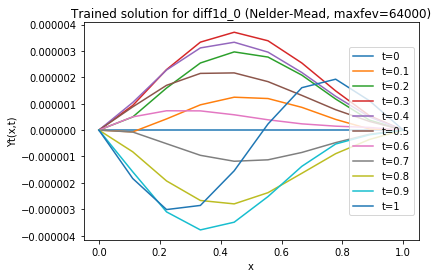

In [22]:
Yt6 = net6.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt6[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

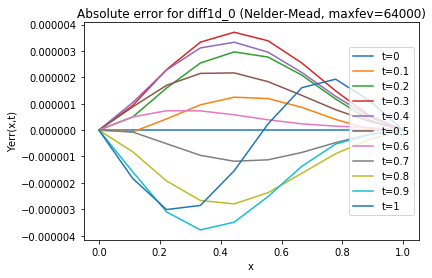

In [23]:
Y_err6 = Yt6 - Ya
for i in range(nt):
    plt.plot(xt, Y_err6[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

## Nelder-Mead (maxfev=64000, xatol=fatol=1e-10)

In [24]:
net7 = NNPDE2DIFF1D(eq)
trainalg = 'Nelder-Mead'
options = {}
options['disp'] = True
options['fatol'] = 1e-10
options['maxfev'] = 64000
options['xatol'] = 1e-10
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net7.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net7.res)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 37146
         Function evaluations: 43942
12min 7s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
 final_simplex: (array([[ 0.08312541,  0.47683358,  0.23164326, ...,  0.29495137,
        -0.36274697,  0.52970356],
       [ 0.08312541,  0.47683358,  0.23164326, ...,  0.29495137,
        -0.36274697,  0.52970356],
       [ 0.08312541,  0.47683358,  0.23164326, ...,  0.29495137,
        -0.36274697,  0.52970356],
       ...,
       [ 0.08312541,  0.47683358,  0.23164326, ...,  0.29495137,
        -0.36274697,  0.52970356],
       [ 0.08312541,  0.47683358,  0.23164326, ...,  0.29495137,
        -0.36274697,  0.52970356],
       [ 0.08312541,  0.47683358,  0.23164326, ...,  0.29495137,
        -0.36274697,  0.52970356]]), array([2.79993787e-07, 2.79993787e-07, 2.79993787e-07, 2.79993787e-07,
       2.79993787e-07, 2.79993787e-07, 2.79993787e-07, 2.79993787e-07,
       2.79993787

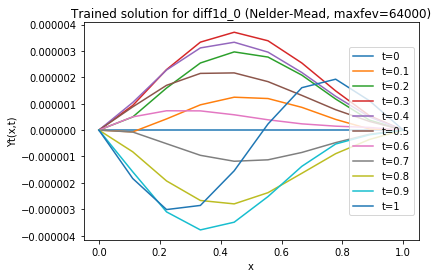

In [25]:
Yt7 = net7.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt7[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

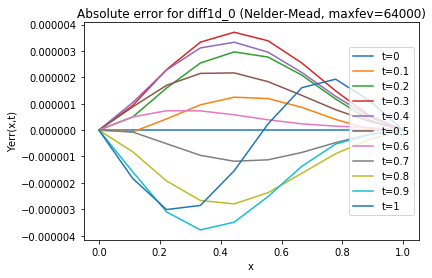

In [26]:
Y_err7 = Yt7 - Ya
for i in range(nt):
    plt.plot(xt, Y_err7[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));